In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.set_loglevel("info")

In [261]:
# Input files
df_file = "evaluation/results_CC_0.3/evaluation_all.tsv"
out_folder = "evaluation/results_CC_0.3/"

# Set to None if you don't want to use it. Results will not be grouped/filtered by team
names_file = {
  'filename': ['naive.tsv', 'diamondblast.tsv', 'deepgose.tsv', 'sprof.tsv', 'transfew.tsv', 'Structure.tsv', 'Sequence.tsv', 'Interpro.tsv', 'Text.tsv', 'Consensus_w_structure.tsv', 'Consensus_wo_structure.tsv'],
  'group': ['naive', 'diamondblast', 'deepgose', 'sprof', 'transfew', 'structure', 'sequence', 'interpro', 'text', 'FunBind_S', 'FunBind_NS'],
  'label': ['Naive', 'DiamondBlast', 'DeepGO-SE', 'SPROF-GO', 'Transfew', 'Structure', 'Sequence', 'Interpro', 'Text', 'FunBind_S', 'FunBind_NS'],
}

# Cumulate the last column of the cols variable, e.g. "pr" --> precision, so that the curves are monotonic as in CAFA
cumulate = True

# Add extreme points to the precision-recall curves (0, 1) and (1, 0)
add_extreme_points = False

# Methods with coverage below this threshold will not be plotted
coverage_threshold = 0.1

# Select a metric
metric, cols = ('f', ['rc', 'pr'])
# metric, cols =  ('f_w', ['rc_w', 'pr_w'])
# metric, cols =  ('f_micro', ['rc_micro', 'pr_micro'])
# metric, cols =  ('f_micro_w', ['rc_micro_w', 'pr_micro_w'])
# metric, cols = ('s_w', ['ru_w', 'mi_w'])

In [262]:
# Map column names to full names (for axis labels)
axis_title_dict = {'pr': 'Precision', 'rc': 'Recall', 'f': 'F-score', 'pr_w': 'Weighted Precision', 'rc_w': 'Weighted Recall', 'f_w': 'Weighted F-score', 'mi': 'Misinformation (Unweighted)', 'ru': 'Remaining Uncertainty (Unweighted)', 'mi_w': 'Misinformation', 'ru_w': 'Remaining Uncertainty', 's': 'S-score', 'pr_micro': 'Precision (Micro)', 'rc_micro': 'Recall (Micro)', 'f_micro': 'F-score (Micro)', 'pr_micro_w': 'Weighted Precision (Micro)', 'rc_micro_w': 'Weighted Recall (Micro)', 'f_micro_w': 'Weighted F-score (Micro)'}

# Map ontology namespaces to full names (for plot titles)
# ontology_dict = {'biological_process': 'BPO', 'molecular_function': 'MFO', 'cellular_component': 'CCO'}
ontology_dict = {'biological_process': 'Biological Process', 'molecular_function': 'Molecular Function', 'cellular_component': 'Cellular Component'}

In [263]:
df = pd.read_csv(df_file, sep="\t")
df

,filename,ns,tau,n,tp,fp,fn,pr,rc,cov,...,pr_w,rc_w,cov_w,mi_w,ru_w,f_w,s_w,pr_micro_w,rc_micro_w,f_micro_w
0,naive.tsv,cellular_component,0.001,206.0,9.7233,325.2767,1.0388,0.0290,0.9094,1.0000,...,0.0141,0.8199,1.0000,555.9161,3.5597,0.0278,555.9275,0.0141,0.6910,0.0277
1,naive.tsv,cellular_component,0.002,206.0,9.7039,274.2961,1.0583,0.0342,0.9076,1.0000,...,0.0170,0.8162,1.0000,453.9891,3.6489,0.0334,454.0038,0.0170,0.6832,0.0332
2,naive.tsv,cellular_component,0.003,206.0,9.5291,232.4709,1.2330,0.0394,0.8938,1.0000,...,0.0210,0.8021,1.0000,356.7583,3.8495,0.0410,356.7791,0.0210,0.6658,0.0408
3,naive.tsv,cellular_component,0.004,206.0,9.3689,193.6311,1.3932,0.0462,0.8842,1.0000,...,0.0257,0.7959,1.0000,286.2245,3.9688,0.0498,286.2521,0.0257,0.6554,0.0495
4,naive.tsv,cellular_component,0.005,206.0,9.3301,175.6699,1.4320,0.0504,0.8812,1.0000,...,0.0266,0.7947,1.0000,275.7802,3.9878,0.0514,275.8090,0.0266,0.6538,0.0511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10984,Consensus_wo_structure.tsv,cellular_component,0.995,103.0,1.2379,0.0049,9.5243,0.9951,0.1455,0.5000,...,0.9903,0.0186,0.5000,0.0001,11.3644,0.0365,11.3644,0.9992,0.0134,0.0264
10985,Consensus_wo_structure.tsv,cellular_component,0.996,95.0,1.0680,0.0049,9.6942,0.9947,0.1316,0.4612,...,0.9895,0.0135,0.4612,0.0001,11.4208,0.0267,11.4208,0.9987,0.0085,0.0168
10986,Consensus_wo_structure.tsv,cellular_component,0.997,76.0,0.8155,0.0049,9.9466,0.9934,0.1019,0.3689,...,0.9868,0.0084,0.3689,0.0001,11.4510,0.0167,11.4510,0.9982,0.0059,0.0116
10987,Consensus_wo_structure.tsv,cellular_component,0.998,57.0,0.6165,0.0049,10.1456,0.9912,0.0804,0.2767,...,0.9825,0.0072,0.2767,0.0001,11.4641,0.0143,11.4641,0.9977,0.0047,0.0094


In [264]:
# Set method information (optional)
if names_file is None:
    df['group'] = df['filename']
    df['label'] = df['filename']
    df['is_baseline'] = False
else:
    # methods = pd.read_csv(names_file, delim_whitespace=True, header=0)
    # df = pd.merge(df, methods, on='filename', how='left')
    methods = pd.DataFrame.from_dict(names_file)
    df = pd.merge(df, methods, on='filename', how='left')
    df['group'].fillna(df['filename'], inplace=True)
    df['label'].fillna(df['filename'], inplace=True)
    if 'is_baseline' not in df:
        df['is_baseline'] = False
    else:
        df['is_baseline'].fillna(False, inplace=True)
    # print(methods)
df = df.drop(columns='filename').set_index(['group', 'label', 'ns', 'tau'])
df

/tmp/ipykernel_30683/2355692437.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['group'].fillna(df['filename'], inplace=True)
/tmp/ipykernel_30683/2355692437.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

n      tp        fp  \
group      label      ns                 tau                              
naive      Naive      cellular_component 0.001  206.0  9.7233  325.2767   
                                         0.002  206.0  9.7039  274.2961   
                                         0.003  206.0  9.5291  232.4709   
                                         0.004  206.0  9.3689  193.6311   
                                         0.005  206.0  9.3301  175.6699   
...                                               ...     ...       ...   
FunBind_NS FunBind_NS cellular_component 0.995  103.0  1.2379    0.0049   
                                         0.996   95.0  1.0680    0.0049   
                                         0.997   76.0  0.8155    0.0049   
                                         0.998   57.0  0.6165    0.0049   
                                         0.999   38.0  0.4223    0.0049   

                                                     fn      pr      rc  \
group      label      ns                 tau                              
naive      Naive      cellular_component 0.001   1.0388  0.0290  0.9094   
                                         0.002   1.0583  0.0342  0.9076   
                                         0.003   1.2330  0.0394  0.8938   
                                         0.004   1.3932  0.0462  0.8842   
                                         0.005   1.4320  0.0504  0.8812   
...                                                 ...     ...     ...   
FunBind_NS FunBind_NS cellular_component 0.995   9.5243  0.9951  0.1455   
                                         0.996   9.6942  0.9947  0.1316   
                                         0.997   9.9466  0.9934  0.1019   
                                         0.998  10.1456  0.9912  0.0804   
                                         0.999  10.3398  0.9868  0.0524   

                                                   cov        mi       ru  \
group      label      ns                 tau                                
naive      Naive      cellular_component 0.001  1.0000  325.2767   1.0388   
                                         0.002  1.0000  274.2961   1.0583   
                                         0.003  1.0000  232.4709   1.2330   
                                         0.004  1.0000  193.6311   1.3932   
                                         0.005  1.0000  175.6699   1.4320   
...                                                ...       ...      ...   
FunBind_NS FunBind_NS cellular_component 0.995  0.5000    0.0049   9.5243   
                                         0.996  0.4612    0.0049   9.6942   
                                         0.997  0.3689    0.0049   9.9466   
                                         0.998  0.2767    0.0049  10.1456   
                                         0.999  0.1845    0.0049  10.3398   

                                                     f  ...    rc_w   cov_w  \
group      label      ns                 tau            ...                   
naive      Naive      cellular_component 0.001  0.0563  ...  0.8199  1.0000   
                                         0.002  0.0659  ...  0.8162  1.0000   
                                         0.003  0.0754  ...  0.8021  1.0000   
                                         0.004  0.0877  ...  0.7959  1.0000   
                                         0.005  0.0954  ...  0.7947  1.0000   
...                                                ...  ...     ...     ...   
FunBind_NS FunBind_NS cellular_component 0.995  0.2539  ...  0.0186  0.5000   
                                         0.996  0.2325  ...  0.0135  0.4612   
                                         0.997  0.1849  ...  0.0084  0.3689   
                                         0.998  0.1487  ...  0.0072  0.2767   
                                         0.999  0.0994  ...  0.0056  0.1845   

                                                    mi_w     ru_w     

In [265]:
# Filter by coverage
df = df[df['cov'] >= coverage_threshold]
df

n      tp        fp  \
group      label      ns                 tau                              
naive      Naive      cellular_component 0.001  206.0  9.7233  325.2767   
                                         0.002  206.0  9.7039  274.2961   
                                         0.003  206.0  9.5291  232.4709   
                                         0.004  206.0  9.3689  193.6311   
                                         0.005  206.0  9.3301  175.6699   
...                                               ...     ...       ...   
FunBind_NS FunBind_NS cellular_component 0.995  103.0  1.2379    0.0049   
                                         0.996   95.0  1.0680    0.0049   
                                         0.997   76.0  0.8155    0.0049   
                                         0.998   57.0  0.6165    0.0049   
                                         0.999   38.0  0.4223    0.0049   

                                                     fn      pr      rc  \
group      label      ns                 tau                              
naive      Naive      cellular_component 0.001   1.0388  0.0290  0.9094   
                                         0.002   1.0583  0.0342  0.9076   
                                         0.003   1.2330  0.0394  0.8938   
                                         0.004   1.3932  0.0462  0.8842   
                                         0.005   1.4320  0.0504  0.8812   
...                                                 ...     ...     ...   
FunBind_NS FunBind_NS cellular_component 0.995   9.5243  0.9951  0.1455   
                                         0.996   9.6942  0.9947  0.1316   
                                         0.997   9.9466  0.9934  0.1019   
                                         0.998  10.1456  0.9912  0.0804   
                                         0.999  10.3398  0.9868  0.0524   

                                                   cov        mi       ru  \
group      label      ns                 tau                                
naive      Naive      cellular_component 0.001  1.0000  325.2767   1.0388   
                                         0.002  1.0000  274.2961   1.0583   
                                         0.003  1.0000  232.4709   1.2330   
                                         0.004  1.0000  193.6311   1.3932   
                                         0.005  1.0000  175.6699   1.4320   
...                                                ...       ...      ...   
FunBind_NS FunBind_NS cellular_component 0.995  0.5000    0.0049   9.5243   
                                         0.996  0.4612    0.0049   9.6942   
                                         0.997  0.3689    0.0049   9.9466   
                                         0.998  0.2767    0.0049  10.1456   
                                         0.999  0.1845    0.0049  10.3398   

                                                     f  ...    rc_w   cov_w  \
group      label      ns                 tau            ...                   
naive      Naive      cellular_component 0.001  0.0563  ...  0.8199  1.0000   
                                         0.002  0.0659  ...  0.8162  1.0000   
                                         0.003  0.0754  ...  0.8021  1.0000   
                                         0.004  0.0877  ...  0.7959  1.0000   
                                         0.005  0.0954  ...  0.7947  1.0000   
...                                                ...  ...     ...     ...   
FunBind_NS FunBind_NS cellular_component 0.995  0.2539  ...  0.0186  0.5000   
                                         0.996  0.2325  ...  0.0135  0.4612   
                                         0.997  0.1849  ...  0.0084  0.3689   
                                         0.998  0.1487  ...  0.0072  0.2767   
                                         0.999  0.0994  ...  0.0056  0.1845   

                                                    mi_w     ru_w     

In [266]:
# Assign colors based on group
cmap = plt.get_cmap('tab20')
df['colors'] = df.index.get_level_values('group')
df['colors'] = pd.factorize(df['colors'])[0]
df['colors'] = df['colors'].apply(lambda x: cmap.colors[x % len(cmap.colors)])
df

/tmp/ipykernel_30683/1899990328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = df.index.get_level_values('group')
/tmp/ipykernel_30683/1899990328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['colors'] = pd.factorize(df['colors'])[0]
/tmp/ipykernel_30683/1899990328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

n      tp        fp  \
group      label      ns                 tau                              
naive      Naive      cellular_component 0.001  206.0  9.7233  325.2767   
                                         0.002  206.0  9.7039  274.2961   
                                         0.003  206.0  9.5291  232.4709   
                                         0.004  206.0  9.3689  193.6311   
                                         0.005  206.0  9.3301  175.6699   
...                                               ...     ...       ...   
FunBind_NS FunBind_NS cellular_component 0.995  103.0  1.2379    0.0049   
                                         0.996   95.0  1.0680    0.0049   
                                         0.997   76.0  0.8155    0.0049   
                                         0.998   57.0  0.6165    0.0049   
                                         0.999   38.0  0.4223    0.0049   

                                                     fn      pr      rc  \
group      label      ns                 tau                              
naive      Naive      cellular_component 0.001   1.0388  0.0290  0.9094   
                                         0.002   1.0583  0.0342  0.9076   
                                         0.003   1.2330  0.0394  0.8938   
                                         0.004   1.3932  0.0462  0.8842   
                                         0.005   1.4320  0.0504  0.8812   
...                                                 ...     ...     ...   
FunBind_NS FunBind_NS cellular_component 0.995   9.5243  0.9951  0.1455   
                                         0.996   9.6942  0.9947  0.1316   
                                         0.997   9.9466  0.9934  0.1019   
                                         0.998  10.1456  0.9912  0.0804   
                                         0.999  10.3398  0.9868  0.0524   

                                                   cov        mi       ru  \
group      label      ns                 tau                                
naive      Naive      cellular_component 0.001  1.0000  325.2767   1.0388   
                                         0.002  1.0000  274.2961   1.0583   
                                         0.003  1.0000  232.4709   1.2330   
                                         0.004  1.0000  193.6311   1.3932   
                                         0.005  1.0000  175.6699   1.4320   
...                                                ...       ...      ...   
FunBind_NS FunBind_NS cellular_component 0.995  0.5000    0.0049   9.5243   
                                         0.996  0.4612    0.0049   9.6942   
                                         0.997  0.3689    0.0049   9.9466   
                                         0.998  0.2767    0.0049  10.1456   
                                         0.999  0.1845    0.0049  10.3398   

                                                     f  ...   cov_w      mi_w  \
group      label      ns                 tau            ...                     
naive      Naive      cellular_component 0.001  0.0563  ...  1.0000  555.9161   
                                         0.002  0.0659  ...  1.0000  453.9891   
                                         0.003  0.0754  ...  1.0000  356.7583   
                                         0.004  0.0877  ...  1.0000  286.2245   
                                         0.005  0.0954  ...  1.0000  275.7802   
...                                                ...  ...     ...       ...   
FunBind_NS FunBind_NS cellular_component 0.995  0.2539  ...  0.5000    0.0001   
                                         0.996  0.2325  ...  0.4612    0.0001   
                                         0.997  0.1849  ...  0.3689    0.0001   
                                         0.998  0.1487  ...  0.2767    0.0001   
                                         0.999  0.0994  ...  0.1845    0.0001   

                                            

In [267]:
# Identify the best methods and thresholds
index_best = df.groupby(level=['group', 'ns'])[metric].idxmax() if metric in ['f', 'f_w', 'f_micro', 'f_micro_w'] else df.groupby(['group', 'ns'])[metric].idxmin()
index_best

group         ns                
FunBind_NS    cellular_component    (FunBind_NS, FunBind_NS, cellular_component, 0...
FunBind_S     cellular_component    (FunBind_S, FunBind_S, cellular_component, 0.398)
deepgose      cellular_component     (deepgose, DeepGO-SE, cellular_component, 0.415)
diamondblast  cellular_component    (diamondblast, DiamondBlast, cellular_componen...
interpro      cellular_component      (interpro, Interpro, cellular_component, 0.282)
naive         cellular_component            (naive, Naive, cellular_component, 0.312)
sequence      cellular_component      (sequence, Sequence, cellular_component, 0.373)
sprof         cellular_component          (sprof, SPROF-GO, cellular_component, 0.34)
structure     cellular_component    (structure, Structure, cellular_component, 0.515)
text          cellular_component              (text, Text, cellular_component, 0.336)
transfew      cellular_component      (transfew, Transfew, cellular_component, 0.477)
Name: f, dtype: objec

In [268]:
# Filter the dataframe for the best methods
df_methods = df.reset_index('tau').loc[[ele[:-1] for ele in index_best], ['tau', 'cov', 'colors'] + cols + [metric]].sort_index()

# Makes the curves monotonic. Cumulative max on the last column of the cols variable, e.g. "pr" --> precision
if cumulate:
    if metric in ['f', 'f_w', 'f_micro', 'f_micro_w']:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummax()
    else:
        df_methods[cols[-1]] = df_methods.groupby(level=['label', 'ns'])[cols[-1]].cummin()


# Save to file
df_methods.drop(columns=['colors']).to_csv('{}/fig_{}.tsv'.format(out_folder, metric), float_format="%.3f", sep="\t")
df_methods

tau     cov  \
group      label      ns                                  
FunBind_NS FunBind_NS cellular_component  0.001  1.0000   
                      cellular_component  0.002  1.0000   
                      cellular_component  0.003  1.0000   
                      cellular_component  0.004  1.0000   
                      cellular_component  0.005  1.0000   
...                                         ...     ...   
transfew   Transfew   cellular_component  0.995  0.6699   
                      cellular_component  0.996  0.6165   
                      cellular_component  0.997  0.5388   
                      cellular_component  0.998  0.4757   
                      cellular_component  0.999  0.3641   

                                                                                     colors  \
group      label      ns                                                                      
FunBind_NS FunBind_NS cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
...                                                                                     ...   
transfew   Transfew   cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                              rc      pr       f  
group      label      ns                                          
FunBind_NS FunBind_NS cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
...                                          ...     ...     ...  
transfew   Transfew   cellular_component  0.2061  0.9417  0.3382  
                      cellular_component  0.1806  0.9433  0.3032  
                      cellular_component  0.1487  0.9433  0.2565  
                      cellular_component  0.1266  0.9433  0.2230  
                      cellular_component  0.0931  0.9433  0.1691  

[10982 rows x 6 columns]

In [269]:
# Add first last points to precision and recall curves to improve APS calculation
def add_points(df_):
    df_ = pd.concat([df_.iloc[0:1], df_])
    df_.iloc[0, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [0, 1, 0]  # tau, rc, pr
    df_ = pd.concat([df_, df_.iloc[-1:]])
    df_.iloc[-1, df_.columns.get_indexer(['tau', cols[0], cols[1]])] = [1.1, 0, 1]
    return df_

if metric.startswith('f') and add_extreme_points:
    df_methods = df_methods.reset_index().groupby(['group', 'label', 'ns'], as_index=False).apply(add_points).set_index(['group', 'label', 'ns'])
df_methods

tau     cov  \
group      label      ns                                  
FunBind_NS FunBind_NS cellular_component  0.001  1.0000   
                      cellular_component  0.002  1.0000   
                      cellular_component  0.003  1.0000   
                      cellular_component  0.004  1.0000   
                      cellular_component  0.005  1.0000   
...                                         ...     ...   
transfew   Transfew   cellular_component  0.995  0.6699   
                      cellular_component  0.996  0.6165   
                      cellular_component  0.997  0.5388   
                      cellular_component  0.998  0.4757   
                      cellular_component  0.999  0.3641   

                                                                                     colors  \
group      label      ns                                                                      
FunBind_NS FunBind_NS cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
                      cellular_component  (0.5490196078431373, 0.33725490196078434, 0.29...   
...                                                                                     ...   
transfew   Transfew   cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   
                      cellular_component  (0.17254901960784313, 0.6274509803921569, 0.17...   

                                              rc      pr       f  
group      label      ns                                          
FunBind_NS FunBind_NS cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
                      cellular_component  0.9372  0.2458  0.3894  
...                                          ...     ...     ...  
transfew   Transfew   cellular_component  0.2061  0.9417  0.3382  
                      cellular_component  0.1806  0.9433  0.3032  
                      cellular_component  0.1487  0.9433  0.2565  
                      cellular_component  0.1266  0.9433  0.2230  
                      cellular_component  0.0931  0.9433  0.1691  

[10982 rows x 6 columns]

In [270]:
# Filter the dataframe for the best method and threshold
df_best = df.loc[index_best, ['cov', 'colors'] + cols + [metric]]
df_best

,,,,cov,colors,rc,pr,f
group,label,ns,tau,,,,,
FunBind_NS,FunBind_NS,cellular_component,0.426,1.0000,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.6853,0.7792,0.7292
FunBind_S,FunBind_S,cellular_component,0.398,1.0000,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.6910,0.7654,0.7263
deepgose,DeepGO-SE,cellular_component,0.415,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.6547,0.6904,0.6721
diamondblast,DiamondBlast,cellular_component,0.514,0.1650,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.1271,0.5699,0.2078
interpro,Interpro,cellular_component,0.282,0.8058,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.5525,0.6103,0.5799
naive,Naive,cellular_component,0.312,1.0000,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.5164,0.6098,0.5593
sequence,Sequence,cellular_component,0.373,1.0000,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.6627,0.7405,0.6995
sprof,SPROF-GO,cellular_component,0.340,1.0000,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.6887,0.7531,0.7195
structure,Structure,cellular_component,0.515,0.8204,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4208,0.7106,0.5286


In [271]:
# Calculate average precision score 
if metric.startswith('f'):
    df_best['aps'] = df_methods.groupby(level=['group', 'label', 'ns'])[[cols[0], cols[1]]].apply(lambda x: (x[cols[0]].diff(-1).shift(1) * x[cols[1]]).sum())
df_best
df_best.to_csv('{}/aps.tsv'.format(out_folder), float_format="%.4f", sep="\t")

In [272]:
# Calculate the max coverage across all thresholds
df_best['max_cov'] = df_methods.groupby(level=['group', 'label', 'ns'])['cov'].max()
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov
group,label,ns,tau,,,,,,,
FunBind_NS,FunBind_NS,cellular_component,0.426,1.0000,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.6853,0.7792,0.7292,0.737819,1.0000
FunBind_S,FunBind_S,cellular_component,0.398,1.0000,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.6910,0.7654,0.7263,0.766986,1.0000
deepgose,DeepGO-SE,cellular_component,0.415,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.6547,0.6904,0.6721,0.663790,1.0000
diamondblast,DiamondBlast,cellular_component,0.514,0.1650,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.1271,0.5699,0.2078,0.007549,0.1650
interpro,Interpro,cellular_component,0.282,0.8058,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.5525,0.6103,0.5799,0.546727,0.8058
naive,Naive,cellular_component,0.312,1.0000,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.5164,0.6098,0.5593,0.432816,1.0000
sequence,Sequence,cellular_component,0.373,1.0000,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.6627,0.7405,0.6995,0.518257,1.0000
sprof,SPROF-GO,cellular_component,0.340,1.0000,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.6887,0.7531,0.7195,0.723563,1.0000
structure,Structure,cellular_component,0.515,0.8204,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4208,0.7106,0.5286,0.455529,0.8204


In [273]:
# Set a label column for the plot legend
df_best['label'] = df_best.index.get_level_values('label')
if 'aps' not in df_best.columns:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} C={x['max_cov']:.3f})", axis=1)
else:
    df_best['label'] = df_best.agg(lambda x: f"{x['label']} ({metric.upper()}={x[metric]:.3f} APS={x['aps']:.3f} C={x['max_cov']:.3f})", axis=1)
df_best

,,,,cov,colors,rc,pr,f,aps,max_cov,label
group,label,ns,tau,,,,,,,,
FunBind_NS,FunBind_NS,cellular_component,0.426,1.0000,"(0.5490196078431373, 0.33725490196078434, 0.29...",0.6853,0.7792,0.7292,0.737819,1.0000,FunBind_NS (F=0.729 APS=0.738 C=1.000)
FunBind_S,FunBind_S,cellular_component,0.398,1.0000,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.6910,0.7654,0.7263,0.766986,1.0000,FunBind_S (F=0.726 APS=0.767 C=1.000)
deepgose,DeepGO-SE,cellular_component,0.415,1.0000,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.6547,0.6904,0.6721,0.663790,1.0000,DeepGO-SE (F=0.672 APS=0.664 C=1.000)
diamondblast,DiamondBlast,cellular_component,0.514,0.1650,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.1271,0.5699,0.2078,0.007549,0.1650,DiamondBlast (F=0.208 APS=0.008 C=0.165)
interpro,Interpro,cellular_component,0.282,0.8058,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.5525,0.6103,0.5799,0.546727,0.8058,Interpro (F=0.580 APS=0.547 C=0.806)
naive,Naive,cellular_component,0.312,1.0000,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.5164,0.6098,0.5593,0.432816,1.0000,Naive (F=0.559 APS=0.433 C=1.000)
sequence,Sequence,cellular_component,0.373,1.0000,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.6627,0.7405,0.6995,0.518257,1.0000,Sequence (F=0.700 APS=0.518 C=1.000)
sprof,SPROF-GO,cellular_component,0.340,1.0000,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.6887,0.7531,0.7195,0.723563,1.0000,SPROF-GO (F=0.720 APS=0.724 C=1.000)
structure,Structure,cellular_component,0.515,0.8204,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.4208,0.7106,0.5286,0.455529,0.8204,Structure (F=0.529 APS=0.456 C=0.820)


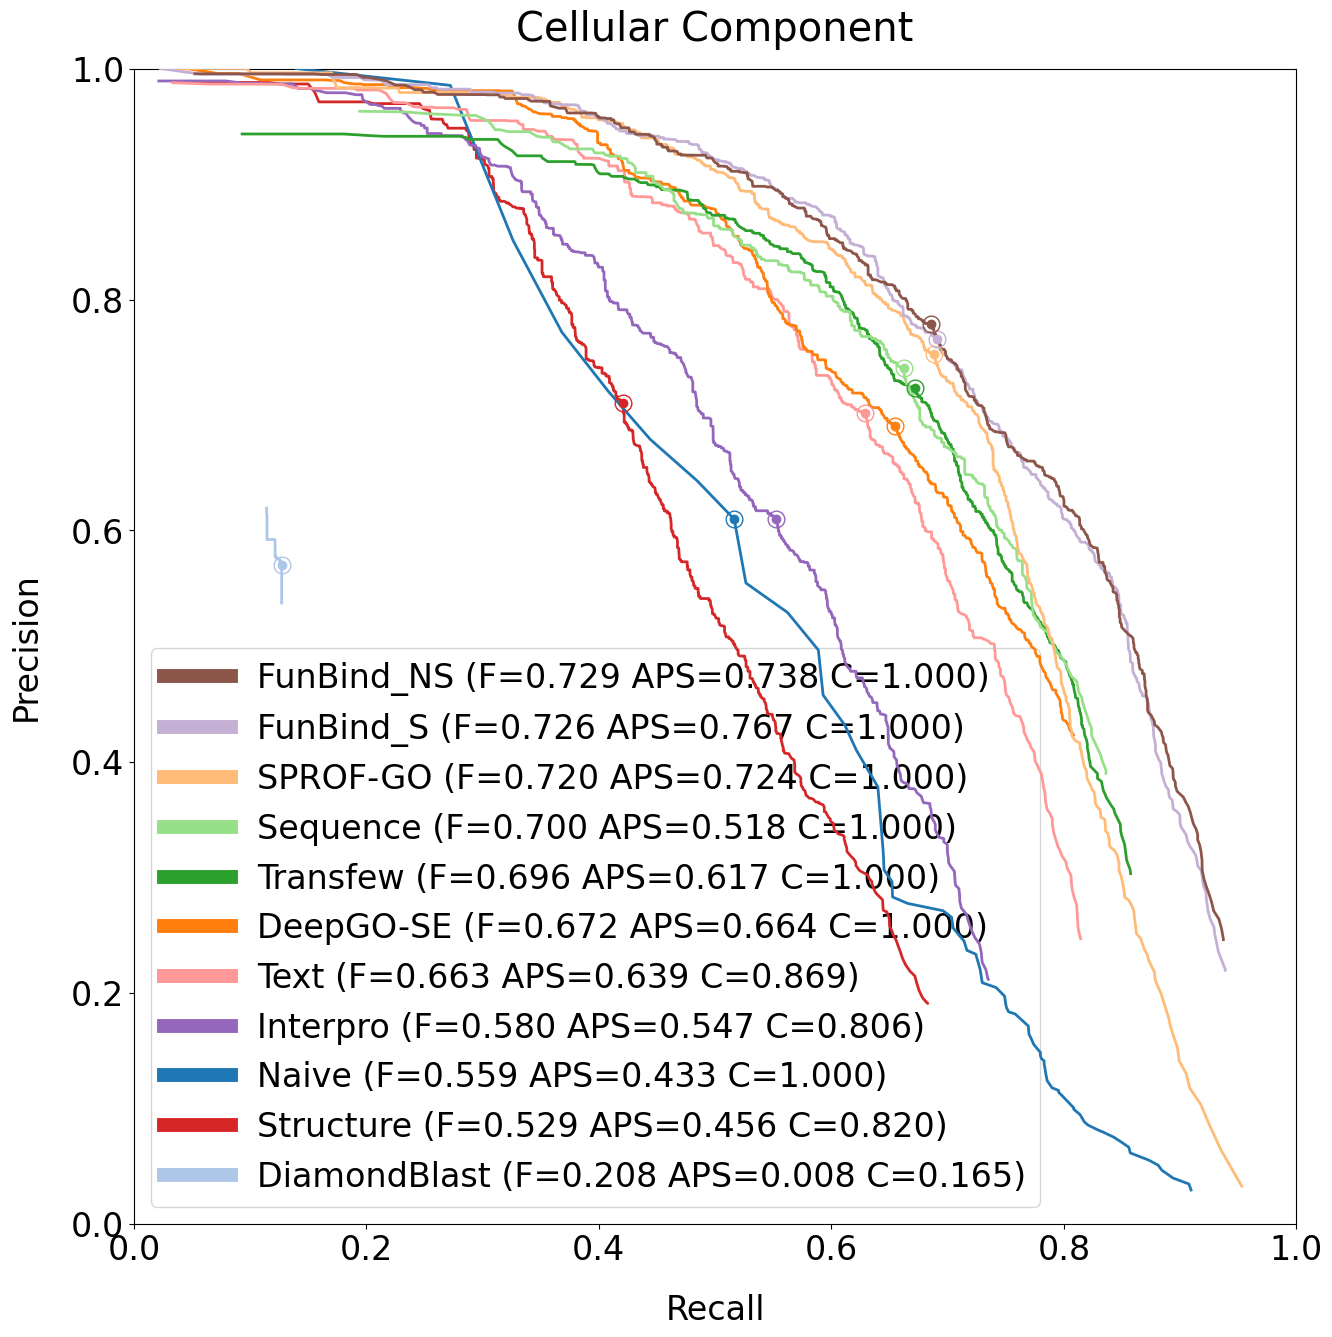

In [274]:
# Generate the figures
plt.rcParams.update({'font.size': 24, 'legend.fontsize': 24})

# F-score contour lines
x = np.arange(0.01, 1, 0.01)
y = np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x, y)
Z = 2 * X * Y / (X + Y)

for ns, df_g in df_best.groupby(level='ns'):
    fig, ax = plt.subplots(figsize=(15, 15))

     # Contour lines. At the moment they are provided only for the F-score
    #if metric.startswith('f'):
        #CS = ax.contour(X, Y, Z, np.arange(0.1, 1.0, 0.1), colors='gray')
     #   ax.clabel(CS, inline=True) #, fontsize=10)

    # Iterate methods
    for i, (index, row) in enumerate(df_g.sort_values(by=[metric, 'max_cov'], ascending=[False if metric.startswith('f') else True, False]).iterrows()):
        data = df_methods.loc[index[:-1]]
        
        # Precision-recall or mi-ru curves
        ax.plot(data[cols[0]], data[cols[1]], color=row['colors'], label=row['label'], lw=2, zorder=500-i)
        
        # F-max or S-min dots
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=12, mfc='none', zorder=1000-i)
        ax.plot(row[cols[0]], row[cols[1]], color=row['colors'], marker='o', markersize=6, zorder=1000-i)

    # Set axes limit
    if metric.startswith('f'):
        plt.xlim(0, 1)
        plt.ylim(0, 1)
   
    # plt.xlim(0, max(1, df_best.loc[:,:,ns,:][cols[0]].max()))
    # plt.ylim(0, max(1, df_best.loc[:,:,ns,:][cols[1]].max()))

    # Set titles
    ax.set_title(ontology_dict.get(ns, ns), pad=20)
    ax.set_xlabel(axis_title_dict[cols[0]], labelpad=20)
    ax.set_ylabel(axis_title_dict[cols[1]], labelpad=20)
    
    # Legend
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    leg = ax.legend(markerscale=6)
    for legobj in leg.get_lines():
        legobj.set_linewidth(10.0)

    # Save figure on disk
    plt.savefig("{}/fig_{}_{}.png".format(out_folder, metric, ns), bbox_inches='tight', dpi=300, transparent=True)
    # plt.clf()